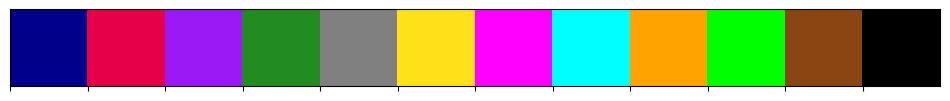

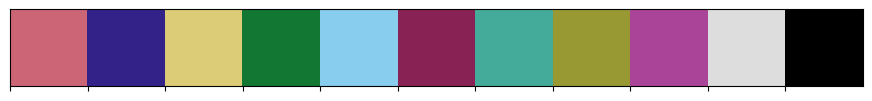

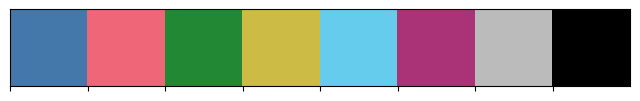

In [1]:
from glob import glob
import itertools
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl

from polyphys.visualize.plotter import PROJECT_DETAILS as PD
from polyphys.visualize.plotter import TITLE_STYLES as TS
from polyphys.visualize.plotter import ATTRIBUTE_LABELS as AL
from polyphys.visualize.plotter import AMIRHSI_COLORS as AC
from polyphys.visualize.plotter import PAUL_TOL_MUTED as PTM
from polyphys.visualize.plotter import PAUL_TOL_BRIGHT as PTB

from polyphys.visualize import tuner
from polyphys.manage import organizer
from polyphys.probe import logger
from polyphys.manage import utilizer 
from polyphys.manage.parser import TwoMonDep
from polyphys.analyze import clusters
from polyphys.analyze import measurer
import warnings
warnings.filterwarnings("ignore")
#database = '../../Datasets/'
database = '/Users/amirhsi_mini/research_data/analysis/'
sns.palplot(AC)
sns.palplot(PTM)
sns.palplot(PTB)

In [2]:
project = 'TwoMonDep'

log_details = {
    'TwoMonDep': {
        'space_pat': 'nm*am*ac*nc*',
        'hierarchy': '/am*.log',  # dir/file
        'parser': TwoMonDep,
        'lineage': 'whole',
        'geometry': 'cubic',
        'group': 'bug',
        'topology': 'atom',
        'product_idx': 1
    }
}
#log_db = "/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets/logs/"
#log_db = '/Users/amirhsi_mini/research_data/TransFociCub/logs/'
log_db = '/Users/amirhsi/research_data/'+project+'-logs/'
space_dbs = glob(log_db + log_details[project]['space_pat'] + '-logs')
space_dbs.sort()

In [3]:
thermos = []
#run_stats = []
#wall_times = []
save_to = './'

for space_db in space_dbs:
    print(space_db)
    space = space_db.split("/")[-1]
    logs = glob(space_db + log_details[project]['hierarchy'])
    logs = organizer.sort_filenames(logs,  fmts=['.log']) # sorted
    logs = [log[0] for log in logs]
    for log in logs:
        print(log)
        log_info = log_details[project]['parser'](
            log,
            log_details[project]['lineage'],
            log_details[project]['geometry'],
            log_details[project]['group'],
            log_details[project]['topology']
        )
        lineage = log_details[project]['lineage']
        # handling product_idx in segmented logs:
        if lineage == 'segment' and log_info.segment_id>1:
            product_idx = 0
        # handling product_idx in restart logs which do not have product phase
        if  not (log.endswith('restart.log') | log.endswith('restart2ndRound.log')):
            product_idx = log_details[project]['product_idx']
        else:
            product_idx = 0
        try:
            log_data = logger.LammpsLog(log, product_idx)
        except (logger.BrokenLogError, IndexError):
            print("broken log: ", log_info.filepath.split("/")[-1])
        log_data.extract_thermo()
        #log_data.extract_run_stat()
        thermo = log_data.thermo
        #run_stat = log_data.run_stat
        #wall_time = log_data.wall_time
        for attr_name in log_info._lineage_attributes[lineage].keys():
            attr_value = getattr(log_info, attr_name)
            thermo[attr_name] = attr_value
        attr_names = ['phi_m_bulk', 'rho_m_bulk', 'phi_c_bulk', 'rho_c_bulk']
        for attr_name in attr_names:
            attr_value = getattr(log_info, attr_name)
            thermo[attr_name] = attr_value
        for lineage_name in log_info.genealogy:
            attr_value = getattr(log_info, lineage_name)
            thermo[lineage_name] = attr_value
            #run_stat[lineage_name] = attr_value
            #wall_time[lineage_name] = attr_value
        thermos.append(thermo)
        #run_stats.append(run_stat)
        #wall_times.append(wall_time)

output = "-".join(["allInOne", project, "thermo"])
thermos = pd.concat(thermos)
thermos.reset_index(inplace=True, drop=True)
thermos.to_parquet(
    save_to + output + ".parquet.brotli", index=False, compression='brotli'
)
output = "-".join(["allInOne", project, "runStat"])
#run_stats = pd.concat(run_stats)
#run_stats.reset_index(inplace=True, drop=True)
#run_stats.to_csv(save_to + output + ".csv", index=False)
output = "-".join(["allInOne", project, "wallTimeStat"])
#wall_times = pd.concat(wall_times)
#wall_times.reset_index(inplace=True, drop=True)
#wall_times.to_csv(save_to + output + ".csv", index=False)

/Users/amirhsi/research_data/TwoMonDep-logs/nm2am5.0ac1.0nc8953-logs
/Users/amirhsi/research_data/TwoMonDep-logs/nm2am5.0ac1.0nc8953-logs/am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump2000adump5000tdump5000ens1.log
/Users/amirhsi/research_data/TwoMonDep-logs/nm2am5.0ac1.0nc8953-logs/am5.0nm2ac1.0nc8953hl12.5sd0.2dt0.0005bdump2000adump5000tdump5000ens1.log
/Users/amirhsi/research_data/TwoMonDep-logs/nm2am5.0ac1.0nc8953-logs/am5.0nm2ac1.0nc8953hl12.5sd0.4dt0.0005bdump2000adump5000tdump5000ens1.log
/Users/amirhsi/research_data/TwoMonDep-logs/nm2am5.0ac1.0nc8953-logs/am5.0nm2ac1.0nc8953hl12.5sd0.6dt0.0005bdump2000adump5000tdump5000ens1.log
/Users/amirhsi/research_data/TwoMonDep-logs/nm2am5.0ac1.0nc8953-logs/am5.0nm2ac1.0nc8953hl12.5sd0.8dt0.0005bdump2000adump5000tdump5000ens1.log
/Users/amirhsi/research_data/TwoMonDep-logs/nm2am5.0ac1.0nc8953-logs/am5.0nm2ac1.0nc8953hl12.5sd1.0dt0.0005bdump2000adump5000tdump5000ens1.log
/Users/amirhsi/research_data/TwoMonDep-logs/nm2am5.0ac1.0nc8953-logs/am5.

In [4]:
print(thermos.columns)

Index(['Step', 'Temp', 'Press', 'TotEng', 'PotEng', 'KinEng', 'E_pair',
       'E_vdwl', 'Ecouple', 'Econserve', 'f_e_spring_1', 'f_e_spring_2',
       'e_m1_c', 'fx_m1_c', 'fy_m1_c', 'fz_m1_c', 'e_m2_c', 'fx_m2_c',
       'fy_m2_c', 'fz_m2_c', 'e_m1_m2', 'fx_m1_m2', 'fy_m1_m2', 'fz_m1_m2',
       'nmon', 'amon', 'lcube', 'dcrowd', 'ncrowd', 'd_sur', 'dt', 'bdump',
       'adump', 'tdump', 'ensemble_id', 'phi_m_bulk', 'rho_m_bulk',
       'phi_c_bulk', 'rho_c_bulk', 'lineage_name', 'whole', 'ensemble_long',
       'ensemble', 'space'],
      dtype='object')


In [5]:
thermos['fx_dep'] = (thermos['fx_m1_c'] - thermos['fx_m2_c']) / 2

thermos['fy_dep'] = (thermos['fy_m1_c'] - thermos['fy_m2_c']) / 2
thermos['fz_dep'] = (thermos['fz_m1_c'] - thermos['fz_m2_c']) / 2
thermos['e_dep_avg'] = (thermos['e_m1_c'] + thermos['e_m2_c']) / 2
thermos['e_dep_diff'] = (thermos['e_m1_c'] - thermos['e_m2_c']) / 2

thermo_vars = ['Temp', 'Press', 'TotEng', 'PotEng', 'KinEng', 'E_pair',
       'E_vdwl', 'Ecouple', 'Econserve', 'f_e_spring_1', 'f_e_spring_2',
       'e_m1_c', 'fx_m1_c', 'fy_m1_c', 'fz_m1_c', 'e_m2_c', 'fx_m2_c',
       'fy_m2_c', 'fz_m2_c', 'e_m1_m2', 'fx_m1_m2', 'fy_m1_m2', 'fz_m1_m2',
       'fx_dep', 'fy_dep', 'fz_dep', 'e_dep_avg', 'e_dep_diff'
       ]
id_vars = ['nmon', 'amon', 'lcube', 'dcrowd', 'ncrowd', 'd_sur', 'dt', 'bdump',
        'adump', 'tdump', 'ensemble_id', 'phi_m_bulk', 'rho_m_bulk',
       'phi_c_bulk', 'rho_c_bulk', 'lineage_name', 'whole', 'ensemble_long',
       'ensemble', 'space']
thermos_avg = thermos.groupby(id_vars)[thermo_vars].agg(['mean', 'sem'])
thermos_avg.columns = thermos_avg.columns.to_flat_index()
new_cols = {col: '_'.join(col).strip('_') for col in thermos_avg.columns}
thermos_avg.rename(columns=new_cols, inplace=True)
thermos_avg
thermos_avg.reset_index(inplace=True)
thermos_avg_melt = pd.melt(thermos_avg, id_vars=id_vars, var_name="variable_stat", value_name='value')
# Separate the "variable_stat" into two columns: "variable" and "stat"
thermos_avg_melt[['variable', 'stat']] = thermos_avg_melt['variable_stat'].str.rsplit('_', n=1, expand=True)
# Drop the original combined column
thermos_avg_melt.drop(columns=['variable_stat'], inplace=True)
# Pivot t o get the desired structure: one column for 'mean' and one for 'var'
thermos_avg_final = thermos_avg_melt.pivot_table(
    index=id_vars + ['variable'],  # Use id_vars and variable as the index
    columns='stat',  # The 'stat' (mean/var) becomes the columns
    values='value'  # Values for mean and var
)
thermos_avg_final.reset_index(inplace=True)

#.reset_index(drop=True)
thermos_avg_final

stat,nmon,amon,lcube,dcrowd,ncrowd,d_sur,dt,bdump,adump,tdump,...,phi_c_bulk,rho_c_bulk,lineage_name,whole,ensemble_long,ensemble,space,variable,mean,sem
0,2,5,12.5,1.0,8953,0.0,0.0005,2000,5000,5000,...,2.400143,4.583936,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,nm2am-1ac1.0nc8953sd0.0,nm2am-1ac1.0nc8953,E_pair,-0.626458,0.000078
1,2,5,12.5,1.0,8953,0.0,0.0005,2000,5000,5000,...,2.400143,4.583936,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,nm2am-1ac1.0nc8953sd0.0,nm2am-1ac1.0nc8953,E_vdwl,-0.626458,0.000078
2,2,5,12.5,1.0,8953,0.0,0.0005,2000,5000,5000,...,2.400143,4.583936,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,nm2am-1ac1.0nc8953sd0.0,nm2am-1ac1.0nc8953,Econserve,25.472861,1.886749
3,2,5,12.5,1.0,8953,0.0,0.0005,2000,5000,5000,...,2.400143,4.583936,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,nm2am-1ac1.0nc8953sd0.0,nm2am-1ac1.0nc8953,Ecouple,24.599908,1.886834
4,2,5,12.5,1.0,8953,0.0,0.0005,2000,5000,5000,...,2.400143,4.583936,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd0.0dt0.0005bdump200...,nm2am-1ac1.0nc8953sd0.0,nm2am-1ac1.0nc8953,KinEng,1.499302,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2,5,12.5,1.0,8953,5.0,0.0005,2000,5000,5000,...,2.400143,4.583936,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,nm2am-1ac1.0nc8953sd5.0,nm2am-1ac1.0nc8953,fy_m2_c,0.000000,0.000000
416,2,5,12.5,1.0,8953,5.0,0.0005,2000,5000,5000,...,2.400143,4.583936,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,nm2am-1ac1.0nc8953sd5.0,nm2am-1ac1.0nc8953,fz_dep,0.000000,0.000000
417,2,5,12.5,1.0,8953,5.0,0.0005,2000,5000,5000,...,2.400143,4.583936,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,nm2am-1ac1.0nc8953sd5.0,nm2am-1ac1.0nc8953,fz_m1_c,0.000000,0.000000
418,2,5,12.5,1.0,8953,5.0,0.0005,2000,5000,5000,...,2.400143,4.583936,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,am5.0nm2ac1.0nc8953hl12.5sd5.0dt0.0005bdump200...,nm2am-1ac1.0nc8953sd5.0,nm2am-1ac1.0nc8953,fz_m1_m2,0.000000,0.000000


In [6]:
save_to = '../images/'
for thermo_var in thermo_vars:
    grid = sns.relplot(
        data=thermos,
        x='Step',
        y=thermo_var,
        col='d_sur',
        col_wrap=3,
        kind='line', 
    )
    grid.tight_layout()
    grid.figure.savefig(save_to+f"time_series-d_sur_as_col-{thermo_var}.pdf")
    plt.close()

In [7]:
save_to = '../images/'
y_prop = 'mean'
selected_cols = [#'e_m1_c', 'fx_m1_c', 'fy_m1_c', 'fz_m1_c', 'e_m2_c',
                 #'fx_m2_c', 'fy_m2_c', 'fz_m2_c', 'e_m1_m2', 'fx_m1_m2',
                 #'fy_m1_m2', 'fz_m1_m2',
                 'fx_dep', 'fy_dep', 'fz_dep',
                 'e_dep_avg', 'e_dep_diff']
data = thermos_avg_final.loc[thermos_avg_final['variable'].isin(selected_cols),['d_sur','mean', 'sem', 'variable']]
grid = sns.relplot(
    data=data,
    x='d_sur',
    y=y_prop,
    col='variable',
    col_wrap=5,
    kind='line',
    marker='s',
    facet_kws={'sharey': False, 'sharex': False}
)
grid.set_xlabels(r"$(r-a_m)/a_c$")
grid.tight_layout()
grid.figure.savefig(save_to + f"equilibrium_var_vs_d_sur-{y_prop}.pdf")
plt.close()